In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
xmlsaetze = pickle.load(open( '../00_data/cleaned/xmlsaetze.pkl','rb') )
df = pickle.load(open( '../00_data/cleaned/sitzungssummary.pkl','rb') )

df_5 = df[df.interventiongroup=='5']
df_6 = df[df.interventiongroup=='6']
df_5 = pd.merge(df_5,xmlsaetze, on='UebungsID')
df_6 = pd.merge(df_6,xmlsaetze, on='UebungsID')
df_5 = df_5[['UebungsID','UserID_x','AufgabenID', 'Version', 'Datum_y','SatzID']]
df_6 = df_6[['UebungsID','UserID_x','AufgabenID', 'Version', 'Datum_y','SatzID']]


Intervention 5

In [10]:
len(df_5.UebungsID.unique())


5733

In [11]:
len(df_6.UebungsID.unique())

6196

In [65]:
# all aufgaben fuer Intv 5 
aufgabenID = df_5.AufgabenID.unique()

# Create an empty list of the sequences
sequences = []

for x in aufgabenID:
    df_aufg = df_5[df_5.AufgabenID ==x]

    #alle uebungsIDs
    uebungsID = df_aufg.UebungsID.unique()
    
    for y in uebungsID:
        sequence_temp = df_aufg[df_aufg.UebungsID == y]
        sequence_temp = sequence_temp.sort_values(by=['Datum_y'])
        id_list = sequence_temp['SatzID'].tolist()
        sequences.extend([id_list])


from Levenshtein import distance
# Create an empty list to store the Levenshtein distances
distances = []

# Iterate through the sequences and calculate the Levenshtein distance
for i in range(len(sequences)):
    for j in range(i+1,len(sequences)):
        distances.append(distance(sequences[i], sequences[j]))

# Create a DataFrame to store the Levenshtein distances
levenshtein_score_intv5 = pd.DataFrame(distances, columns=['Levenshtein_score'])



Intervention 6

In [66]:
# all aufgaben fuer Intv 6
aufgabenID = df_6.AufgabenID.unique()

# Create an empty list of the sequences
sequences = []

for x in aufgabenID:
    df_aufg = df_6[df_6.AufgabenID ==x]

    #alle uebungsIDs
    uebungsID = df_aufg.UebungsID.unique()
    
    for y in uebungsID:
        sequence_temp = df_aufg[df_aufg.UebungsID == y]
        sequence_temp = sequence_temp.sort_values(by=['Datum_y'])
        id_list = sequence_temp['SatzID'].tolist()
        sequences.extend([id_list])


from Levenshtein import distance
# Create an empty list to store the Levenshtein distances
distances = []

# Iterate through the sequences and calculate the Levenshtein distance
for i in range(len(sequences)):
    for j in range(i+1,len(sequences)):
        distances.append(distance(sequences[i], sequences[j]))

# Create a DataFrame to store the Levenshtein distances
levenshtein_score_intv6 = pd.DataFrame(distances, columns=['Levenshtein_score'])


Visualization

In [67]:
print(len(levenshtein_score_intv5))
print(len(levenshtein_score_intv6))

16430778
19192110


In [69]:
levenshtein_score_intv5

,Levenshtein_score
0,20
1,22
2,16
3,22
4,17
...,...
16430773,62
16430774,18
16430775,66
16430776,22


In [71]:
n = 100000
downsampled_data_intv5 = levenshtein_score_intv5.sample(n)
downsampled_data_intv6 = levenshtein_score_intv6.sample(n)

<AxesSubplot:xlabel='Levenshtein_score', ylabel='Count'>

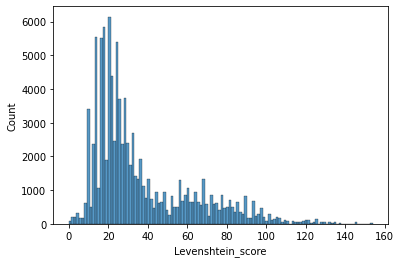

In [73]:
sns.histplot(data=downsampled_data_intv5, x="Levenshtein_score")

<AxesSubplot:xlabel='Levenshtein_score', ylabel='Count'>

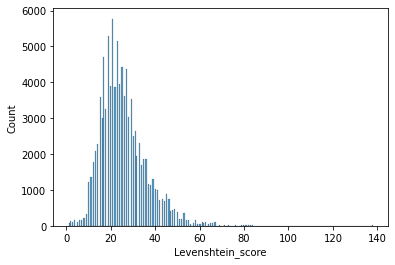

In [72]:
sns.histplot(data=downsampled_data_intv6, x="Levenshtein_score")